# Εργασία στο μάθημα Αναγνώριση Προτύπων
# 2ο Παραδοτέο
** *
<font size="4">Χριστίνα Κούτση 9871
Ευσεβεία Νεστοροπούλου 9703</font>

## Part A
***
<font size="4.5">**Question 1**</font>
***


The probability distribution function is:
 $$p(x|\theta) = \frac{1}{\pi}\frac{1}{1+(x-θ)^2} $$

Design a Maximum Likelihood Estimator and estimate $\hat{θ_1}$ and $\hat{θ2}$ for both classes, given $D_1 = [2.8, −0.4, −0.8, 2.3, −0.3, 3.6, 4.1]$ and $D_2 = [−4.5, −3.4, −3.1, −3.0, −2.3]$.

Plot $log(p(D_1|θ))$ and $log(p(D_2|θ))$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.constants import pi


In [2]:
"""
Initialise data
    w1 -> without stress
    w2 -> with stress
"""

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]
N = 12

# We create a theta array to help us plot the log likelihood
dx = 0.01
theta_array = np.arange(-10, 10, dx)

# We need to calculate the a-priori possibilities for the A.2 question
a_priori_D1 = len(D1)/N
a_priori_D2 = len(D2)/N


In [3]:
"""
We code our probability distribution function: P(x|θ) = (1/π) * 1 / ( 1 + (x-θ)^2 )
    @param x: one instance of our sample
    @param theta: our initial guess for theta (= 1)
"""
def dist_function(x, theta):

    prefactor = (1/np.pi)
    f = prefactor * 1 / (1 + (x - theta)**2 )

    return f

"""
We calculate the negative of the log likelihood (because of minimise function)
    @param p: contains our initial guess: [theta, mu, sigma]
    @param x: is the sample we want to calculate the log likelihood for (D1 or D2)
"""
def log_likelihood(p, x):

    theta = p[0]
    length_x = len(x)
    f = np.zeros(length_x)

    for i in range(0, length_x):
        x_sample = x[i]
        f[i] = dist_function(x_sample, theta)

    f = np.log(f)
    f = np.sum(f)

    return -f

"""
This function calculates the log likelihood for each sample and each theta from theta_array and plots the outcome.
    @param x: our sample (D1 or D2)
    @param sample: an index to indicate if we use D1 sample or D2 sample
"""
def plot_log(x, sample):

    ll = []
    loglike = np.zeros(len(x))

    for theta in theta_array:
        for i in range(len(x)):
            temp = dist_function(x[i], theta)
            loglike[i] = np.log(temp)
        temp = np.sum(loglike)
        ll.append(temp)

    plt.plot(theta_array, ll)
    plt.xlabel('$theta$',fontsize='large')
    plt.ylabel('$log[ P(D|theta) ]$',fontsize='large')

    if sample==1:
        plt.title('For D1 sample')
    else:
        plt.title('For D2 sample')
    plt.show()

# sigma must be greater than zero, so we use this constraint function with minimize
def constraint( p ):
    return p[2]

Estimation of theta for D1 sample:  2.599822280061156
Estimation of theta for D2 sample:  -3.15851703562229


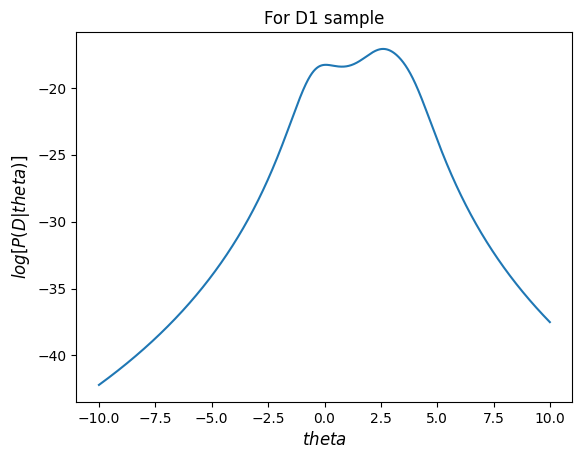

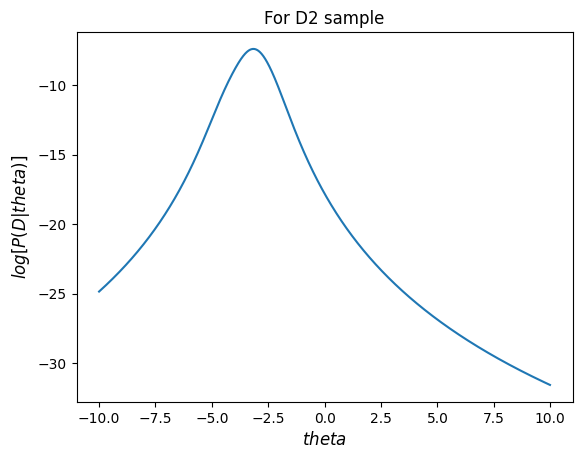

In [4]:
#  We add the constraint function to a dictionary
cons = ({'type':'ineq', 'fun': constraint})

#  Our initial guess for parameters
p0 = [1, 1, 1]

#  We call minimize function for D1 sample
lik_model = minimize(log_likelihood, p0, args =D1, constraints=cons)
theta1 = lik_model.x[0]
print("Estimation of theta for D1 sample: ", theta1)

#  We call minimize function for D2 sample
lik_model = minimize(log_likelihood, p0, args =D2, constraints=cons)
theta2 = lik_model.x[0]
print("Estimation of theta for D2 sample: ", theta2)

# Plot the output log[P(D1|theta)] for D1 and D2 samples
plot_log(D1, 1)
plot_log(D2, 2)

Use the discriminant function $$g(x) = log(p(x|\hat{θ_1}) - log(p(x|\hat{θ_2}) + P(ω_1) - P(ω_2)$$
and classify the two sets of values. What can we conclude about the sign of g(x)? Describe the rule of decision.

In [5]:
"""
We code our probability distribution function: P(x|θ) = (1/π) * 1 / ( 1 + (x-θ)^2 )
    @param x: one instance of our sample
    @param theta: the calculated best theta for each sample
"""
def dist_function(x, theta):

    prefactor = (1/np.pi)
    f = prefactor * 1 / (1 + (x - theta)**2 )

    return f

"""
This function takes the combined sample, uses the given g function and classifies the output values accordingly.
    g(x) = log P (x|θ̂1 ) − log P (x|θ̂2 ) + log P (ω1 ) − log P (ω2 )

    @param sample: our combined sample
    @param theta1: the best theta for D1 we calculated earlier
    @param theta2: the best theta for D2 we calculated earlier
"""
def predict(sample, theta_1, theta_2):

    class1 = []
    class2 = []
    values_class1 = []
    values_class2 = []

    for x in sample:
        value = np.log(dist_function(x, theta_1)) - np.log(dist_function(x, theta_2)) + np.log(
            a_priori_D1) - np.log(a_priori_D2)
        if value > 0:
            class1.append(x)
            values_class1.append(value)
        else:
            class2.append(x)
            values_class2.append(value)

    return class1, class2, values_class1, values_class2

"""
This function assigns a color to each value depending their class (from the previous function). It will help us visualize whether the given g function is good for our data.
    @param new_class: shows the new class of each value.
"""
def assign_color(new_class):

    color = []

    for i in range(np.size(new_class)):
        if new_class[i] in D1:
            color.append(0)
        elif new_class[i] in D2:
            color.append(1)

    return color

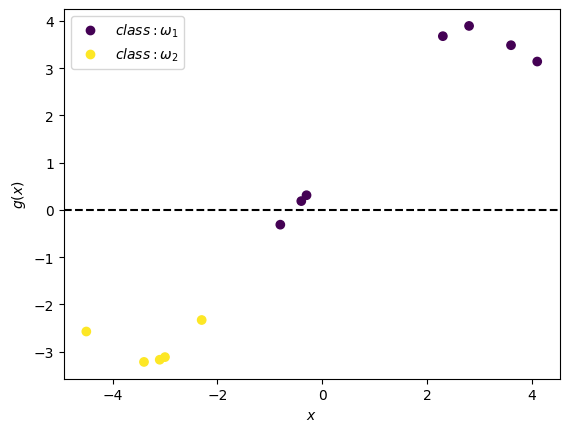

In [6]:
# We predict for each value of the combined sample the new class.
combined = np.concatenate((D1, D2))
class_1, class_2, values_class_1, values_class_2 = predict(combined, theta1, theta2)

# We assign a color to each class for better visualisation.
color_class1 = assign_color(class_1)
color_class2 = assign_color(class_2)
colors = np.concatenate((color_class1, color_class2))

# Plot the D1 and D2 values and the Decision Rule (= 0)
labels = ['$ class: ω_1$', '$ class: ω_2$']

fig, ax = plt.subplots()
scatter = ax.scatter([class_1, class_2], [values_class_1, values_class_2], c=colors)
ax.axhline(y=0, color="black", linestyle='--')
ax.set_xlabel('$x$')
ax.set_ylabel('$g(x)$')
handles = scatter.legend_elements(num=[0, 1])[0]
ax.legend(handles=handles, labels=labels)
plt.show()

<font size="4.5">**Question 2**</font>
***
We classified our data with the discriminant function:
$$g(x) = log(p(x|\hat{θ_1}) - log(p(x|\hat{θ_2}) + P(ω_1) - P(ω_2)$$
 The result is a straight line in 0 and we split the data into positive and negative values.
**It is obvious that one value is misclassified (assigned to the wrong class), thus the MLE classifier and the given discriminant function $g(x)$ is not the best option for the specific data.**

## Part B
***
<font size="4.5">**Question 1**</font>
***
First, we want to calculate the a-posteriori probability $P(θ|D)$. According to the Bayes decision theory, this probability is given by the formula \
$$P(θ|D) = \dfrac{P(D|θ) P(θ)}{\int{P(D|θ)}P(θ)dθ} $$
where $$P(D|θ) = \prod_{n=1}^{N}{P(x_n;θ)}$$ is the likelihood
and the probability distribution function of theta is
$$ p(θ) = \dfrac{1}{10\pi}\dfrac{1}{1+ {θ/10}^2}$$

In [7]:
"""
We code our probability distribution function of theta: P(θ) = (10/π) * 1 / ( 1 + (θ/10)^2 )
    @param theta_array: the array of all thetas we test
"""
def theta_probability(theta_array): 
    prob = []
    for theta in theta_array:
        value = (1 / (10 * pi)) * 1 / (1 + pow(theta / 10, 2))
        prob.append(value)
    return prob
"""
Returns the likelihood: P(D|θ) = Π(P(x;θ))
    @param theta_array: the array of all thetas we test
    @param sample: sample D1 or D2
"""
def likelihood(sample,theta_array):
    like = []
    for theta in theta_array:
        prob = [dist_function(x, theta) for x in sample]
        val = np.prod(prob)
        like.append(val)
    return like

"""
Returns the a-posteriori probability  𝑃(θ|𝐷) 
    @param likelihood: the calculated likelihood of the sample
    @param theta_probability: the calculated probability of theta
    @param theta_array: the array of all thetas we test
"""
def aposteriori_probability(likelihood,theta_probability,theta_array):
    val = np.array(theta_probability)*np.array(likelihood)
    integral = np.trapz(val, x=theta_array)
    return val/integral


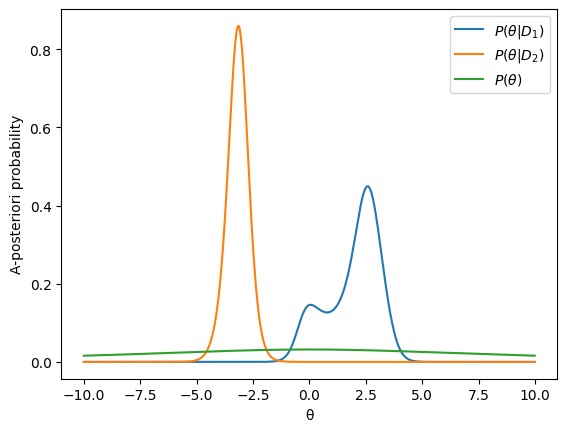

In [8]:
theta_prob = theta_probability(theta_array)
likelihood_D1 = likelihood(D1,theta_array)
p_theta_D1 = aposteriori_probability(likelihood_D1,theta_prob,theta_array)

likelihood_D2 = likelihood(D2,theta_array)
p_theta_D2 = aposteriori_probability(likelihood_D2,theta_prob,theta_array)

plt.plot(theta_array, p_theta_D1)
plt.plot(theta_array, p_theta_D2)
plt.plot(theta_array, theta_prob)
plt.xlabel('θ')
plt.ylabel('A-posteriori probability')
plt.legend(['$ P(θ | D_1) $', '$ P(θ | D_2) $', '$ P(θ) $'])
plt.show()

<font size="4.5">**Question 2**</font>
***
First of all we need to calculate the probability density function p(x|D) for samples D1 and D2, by applying the following formula
$$p(x|D) = \int{p(x|θ,D)p(θ|D)dθ} $$
Next we calculate the value of 
$$h(x) = log(p(x|D_1) - log(p(x|D_2) + log(P(ω_1) - log(P(ω_2)$$

In [13]:
"""
Returns the probability density function p(x|D)
    @param theta_array: the array of all thetas we test
    @param d1: sample d1
    @param d2: sample d2
    @param aposteriori1: the calculated a-posteriori probability 𝑃(θ|𝐷1)
    @param aposteriori2: the calculated a-posteriori probability 𝑃(θ|𝐷2)
"""
def pdf(theta_array, d1, d2, aposteriori1, aposteriori2):
    prob = []
    for x in d1:
        prob.append(dist_function(x, theta_array))
    for x in d2:
        prob.append(dist_function(x, theta_array))
    val = np.multiply(prob, aposteriori1)
    p_x_d1 = np.trapz(val, x=theta_array)
    val = np.multiply(prob, aposteriori2)
    p_x_d2 = np.trapz(val, x=theta_array)

    return p_x_d1,p_x_d2

"""
Predicts if the sample belongs to class 1 or class 2
    @param sample: sample D1 or D2
    @param pdf1: the calculated probability density function p(x|D1)
    @param pdf2: the calculated probability density function p(x|D2)
    @param apriori1: the a-priori probability of class 1
    @param apriori2: the a-priori probability of class 2
    """
def predict(sample,pdf1,pdf2,apriori1,apriori2):
    class1 = []
    class2 = []
    values_class1 = []
    values_class2 = []
    
    for i in range(len(pdf1)):
        value = np.log(pdf1[i]) - np.log(pdf2[i]) + np.log(apriori1) - np.log(apriori2)
        if value > 0:
            class1.append(sample[i])
            values_class1.append(value)
        else:
            class2.append(sample[i])
            values_class2.append(value)

    return class1, class2, values_class1, values_class2


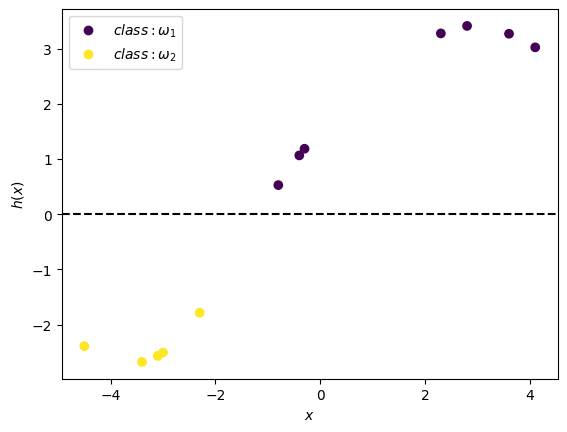

In [12]:
combined = np.concatenate((D1, D2))
p_x_d1,p_x_d2 = pdf(theta_array, D1, D2, p_theta_D1, p_theta_D2)
class_1, class_2, values_class_1, values_class_2 = predict(combined,p_x_d1,p_x_d2, a_priori_D1,a_priori_D2)

# We assign a color to each class for better visualisation.
color_class1 = assign_color(class_1)
color_class2 = assign_color(class_2)
colors = np.concatenate((color_class1, color_class2))

# Plot the D1 and D2 values and the Decision Rule (= 0)
labels = ['$ class: ω_1$', '$ class: ω_2$']

fig, ax = plt.subplots()
scatter = ax.scatter([*class_1, *class_2], [*values_class_1, *values_class_2], c=colors)
ax.axhline(y=0, color="black", linestyle='--')
ax.set_xlabel('$x$')
ax.set_ylabel('$h(x)$')
handles = scatter.legend_elements(num=[0, 1])[0]
ax.legend(handles=handles, labels=labels)
plt.show()

It is obvious from the plot that the classifications using the Bayes estimation was **100% successful** with our database and had a better performance than the classification using the maximum likelihood estimation, where we had one misclassification. However, due to the small size of the database we cannot assume this conclusion to be true for every dataset.